# Artitificial Neural Networks (MNIST)

## Import modules

In [1]:
import torch
from torch import nn, optim
from torch.nn import functional as F
from torch.utils.data import DataLoader

from torchvision import datasets, transforms

from matplotlib import pyplot as plt

torch.manual_seed(0)
torch.cuda.manual_seed(0)

## Connect to Google Drive (in Google Colab)

In [2]:
try:
    from google.colab import drive
    import os

    drive.mount("/gdrive")
    gdrive_root = "/gdrive/My Drive"
    data_dir = os.path.join(gdrive_root, "AI501HW5")
except:
    data_dir = "./"

## Set hyperparameters

In [3]:
max_epoch = 30
learning_rate = 0.0001
batch_size = 512
test_batch_size = 1024
device = "cuda"

## Construct data pipeline

In [4]:
train_dataset = datasets.MNIST(root=data_dir, train=True, download=True, transform=transforms.ToTensor())
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, pin_memory=True)

test_dataset = datasets.MNIST(root=data_dir, train=False, download=True, transform=transforms.ToTensor())
test_loader = DataLoader(test_dataset, batch_size=test_batch_size, shuffle=False, pin_memory=True)

classes = ("0","1","2","3","4","5","6","7","8","9")

## Define a model

In [5]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3)
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        self.flatten = nn.Flatten()
        self.linear = nn.Linear(in_features=1600, out_features=10)

    def forward(self, x):
        x = self.maxpool1(self.relu1(self.conv1(x)))
        x = self.maxpool2(self.relu2(self.conv2(x)))
        x = self.flatten(x)
        x = self.linear(x)
        return x

## Initilize the model and optimizer

In [6]:
model = Classifier().to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

print("Model Structure")
print(model)

Model Structure
Classifier(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (relu1): ReLU()
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (relu2): ReLU()
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear): Linear(in_features=1600, out_features=10, bias=True)
)


## Define the training procedure

In [7]:
def train(model, optimizer, train_loader):
    model.train()

    train_loss = 0
    train_corrects = 0

    for x, y in train_loader:
        inputs = x.to(device)
        labels = y.to(device)
        outputs = model(inputs)

        optimizer.zero_grad()

        loss = F.cross_entropy(outputs, labels)
        loss.backward()

        optimizer.step()

        train_loss += loss.item() * len(x)
        train_corrects += labels.eq(outputs.argmax(dim=1)).sum().item()

    train_loss /= len(train_loader.dataset)
    train_acc = train_corrects / len(train_loader.dataset)

    return train_loss, train_acc

## Define the testing procedure

In [8]:
def test(model, test_loader):
    model.eval()

    test_loss = 0
    test_corrects = 0

    with torch.no_grad():
        for x, y in test_loader:
            inputs = x.to(device)
            labels = y.to(device)
            outputs = model(inputs)

            loss = F.cross_entropy(outputs, labels)

            test_loss += loss.item() * len(x)
            test_corrects += labels.eq(outputs.argmax(dim=1)).sum().item()

        test_loss /= len(test_loader.dataset)
        test_acc = test_corrects / len(test_loader.dataset)

    return test_loss, test_acc

## Train the model

In [9]:
train_loss_hist = []
train_acc_hist = []
test_loss_hist = []
test_acc_hist = []

for epoch in range(max_epoch):
    print(f"[epoch {epoch:2d}] ", end="", flush=True)

    train_loss, train_acc = train(model, optimizer, train_loader)
    print(f"Train loss: {train_loss:.4f} / accuracy: {train_acc:.4f}", end=" | ", flush=True)

    test_loss, test_acc = test(model, test_loader)
    print(f"Test loss: {test_loss:.4f} / accuracy: {test_acc:.4f}", flush=True)

    train_loss_hist.append(train_loss)
    train_acc_hist.append(train_acc)
    test_loss_hist.append(test_loss)
    test_acc_hist.append(test_acc)

[epoch  0] Train loss: 1.8676 / accuracy: 0.6252 | Test loss: 1.1480 / accuracy: 0.7933
[epoch  1] Train loss: 0.7438 / accuracy: 0.8326 | Test loss: 0.4922 / accuracy: 0.8782
[epoch  2] Train loss: 0.4280 / accuracy: 0.8859 | Test loss: 0.3473 / accuracy: 0.9049
[epoch  3] Train loss: 0.3269 / accuracy: 0.9084 | Test loss: 0.2795 / accuracy: 0.9225
[epoch  4] Train loss: 0.2680 / accuracy: 0.9233 | Test loss: 0.2279 / accuracy: 0.9378
[epoch  5] Train loss: 0.2269 / accuracy: 0.9352 | Test loss: 0.1933 / accuracy: 0.9455
[epoch  6] Train loss: 0.1948 / accuracy: 0.9445 | Test loss: 0.1660 / accuracy: 0.9533
[epoch  7] Train loss: 0.1695 / accuracy: 0.9516 | Test loss: 0.1452 / accuracy: 0.9577
[epoch  8] Train loss: 0.1501 / accuracy: 0.9575 | Test loss: 0.1277 / accuracy: 0.9648
[epoch  9] Train loss: 0.1348 / accuracy: 0.9618 | Test loss: 0.1159 / accuracy: 0.9675
[epoch 10] Train loss: 0.1225 / accuracy: 0.9654 | Test loss: 0.1058 / accuracy: 0.9697
[epoch 11] Train loss: 0.1130 / 

## Plot training result

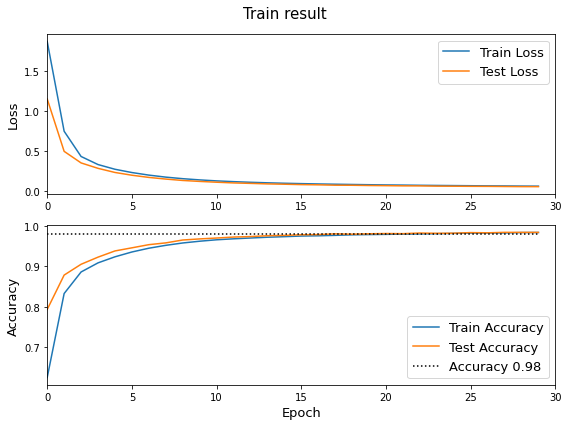

In [10]:
def plot_history(train_loss_hist, train_acc_hist, test_loss_hist, test_acc_hist):
    fig, axes = plt.subplots(2, 1, figsize=(8, 6))

    axes[0].set_xlim(0, len(train_loss_hist))
    axes[0].plot(range(len(train_loss_hist)), train_loss_hist, label="Train Loss")
    axes[0].plot(range(len(test_loss_hist)), test_loss_hist, label="Test Loss")
    axes[0].set_ylabel("Loss", fontsize=13)
    axes[0].legend(fontsize=13)

    axes[1].set_xlim(0, len(train_acc_hist))
    axes[1].plot(range(len(train_acc_hist)), train_acc_hist, label="Train Accuracy")
    axes[1].plot(range(len(test_acc_hist)), test_acc_hist, label="Test Accuracy")
    axes[1].plot(range(len(test_acc_hist)), [0.98] * len(test_acc_hist), "k:", label="Accuracy 0.98")
    axes[1].set_ylabel("Accuracy", fontsize=13)
    axes[1].set_xlabel("Epoch", fontsize=13)
    axes[1].legend(fontsize=13)

    fig.suptitle("Train result", fontsize=15)
    fig.tight_layout()

    return fig

plot_history(train_loss_hist, train_acc_hist, test_loss_hist, test_acc_hist).show()

## Plot classification result

In [11]:
model.eval()

rand_idx = torch.randint(low=0, high=len(test_loader.dataset), size=(6,))

test_inputs = torch.stack([test_dataset[idx][0] for idx in rand_idx])
test_labels = torch.tensor([test_dataset[idx][1] for idx in rand_idx])
test_predictions = model(test_inputs.to(device)).argmax(dim=1)

test_images = test_inputs.squeeze(dim=1)

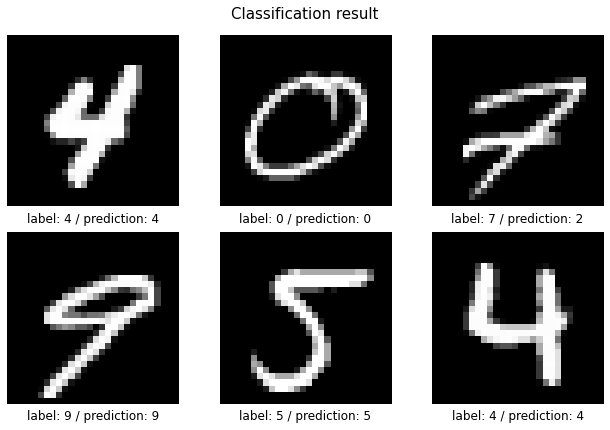

In [12]:
def plot_classification(images, labels, predictions, size):
    fig, axes = plt.subplots(*size, figsize=(size[1] * 3, size[0] * 3))

    for idx, (image, label, prediction) in enumerate(zip(images, labels, predictions)):
        i, j = idx // size[1], idx % size[1]
        axes[i, j].imshow(image, cmap="gray")
        axes[i, j].set_title(f"label: {label} / prediction: {prediction}", y=-0.13)
        axes[i, j].axis("off")

    fig.suptitle("Classification result", fontsize=15)
    fig.tight_layout()

    return fig

plot_classification(test_images, test_labels, test_predictions, size=(2, 3)).show()

## Discussion and Analysis

Fill here with your discussion